In [1]:
import argparse
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
ind = 1
data = np.load(f'q3_data/mysterydata{ind}.npy')
colors = np.load('q3_data/colors.npy')

In [3]:
data.shape

(512, 512, 9)

In [4]:
colors.shape

(1024, 3)

In [5]:
colors[:10,:]

array([[0.050383, 0.029803, 0.527975],
       [0.063536, 0.028426, 0.533124],
       [0.075353, 0.027206, 0.538007],
       [0.086222, 0.026125, 0.542658],
       [0.096379, 0.025165, 0.547103],
       [0.10598 , 0.024309, 0.551368],
       [0.115124, 0.023556, 0.555468],
       [0.123903, 0.022878, 0.559423],
       [0.132381, 0.022258, 0.56325 ],
       [0.140603, 0.021687, 0.566959]])

In [6]:
for idx in range(9):
    print(f'Chaneel{idx} mean : {np.mean(data[:,:,idx])}')

Chaneel0 mean : 0.5753860473632812
Chaneel1 mean : 3.4951019287109375
Chaneel2 mean : 114.3991470336914
Chaneel3 mean : 189.16471481323242
Chaneel4 mean : 68.10416030883789
Chaneel5 mean : 11.921142578125
Chaneel6 mean : 2.5890045166015625
Chaneel7 mean : 23.452579498291016
Chaneel8 mean : 357.6133728027344


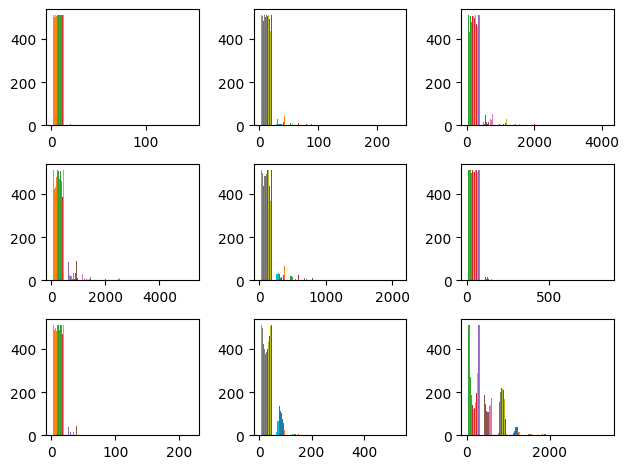

In [7]:
plt.subplot(3,3,9)

for ax in range(3):
    for ay in range(3):
        idx = ax * 3 + ay
        plt.subplot(3,3,idx+1)
        plt.hist(data[:,:,idx])
plt.tight_layout()
plt.savefig('default.png',dpi = 600)

In [8]:
new_pic = np.zeros((512,512,3))

ch0 = np.stack([data[:,:,1],data[:,:,2],data[:,:,3],data[:,:,4]], axis = 2)
ch1 = np.stack([data[:,:,0],data[:,:,5],data[:,:,6]], axis = 2)
ch2 = np.stack([data[:,:,7], data[:,:,8]], axis =2)

In [10]:
new_pic[:,:,0] = np.mean(ch0, axis=2)
new_pic[:,:,1] = np.mean(ch1, axis=2)
new_pic[:,:,2] = np.mean(ch2, axis=2)

In [11]:
ch = 0
v_max = new_pic[:,:,0].max()
v_min = new_pic[:,:,ch].min()
new_pic[:,:,ch] = (new_pic[:,:,ch] - v_min) / (v_max - v_min)
new_pic[:,:,ch] = 1023 * new_pic[:,:,ch]

In [12]:
result=  new_pic[:,:,ch].copy().astype('int')

In [13]:
result

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
new_pic[:,:,0] = np.mean(ch0, axis=2)
new_pic[:,:,1] = np.mean(ch1, axis=2)
new_pic[:,:,2] = np.mean(ch2, axis=2)
result = np.zeros((512,512,3), dtype = 'int64')
output = np.zeros((512,512,3), dtype = 'float64')
for ch in range(3): 
    v_max = new_pic[:,:,ch].max()
    v_min = new_pic[:,:,ch].min()
    new_pic[:,:,ch] = (new_pic[:,:,ch] - v_min) / (v_max - v_min)
    new_pic[:,:,ch] = (1023) * new_pic[:,:,ch] 
    result[:,:,ch] =  new_pic[:,:,ch].copy().astype('int64')
    output[:,:,ch] = colors[result[:,:,ch],ch]
    

In [15]:
output

array([[[0.050383, 0.029803, 0.527975],
        [0.050383, 0.029803, 0.527975],
        [0.050383, 0.029803, 0.527975],
        ...,
        [0.050383, 0.029803, 0.527975],
        [0.050383, 0.029803, 0.527975],
        [0.050383, 0.029803, 0.527975]],

       [[0.050383, 0.029803, 0.527975],
        [0.050383, 0.029803, 0.527975],
        [0.050383, 0.029803, 0.527975],
        ...,
        [0.050383, 0.029803, 0.527975],
        [0.050383, 0.029803, 0.527975],
        [0.050383, 0.029803, 0.527975]],

       [[0.050383, 0.029803, 0.527975],
        [0.050383, 0.029803, 0.527975],
        [0.050383, 0.029803, 0.527975],
        ...,
        [0.050383, 0.029803, 0.527975],
        [0.050383, 0.029803, 0.527975],
        [0.050383, 0.029803, 0.527975]],

       ...,

       [[0.050383, 0.029803, 0.527975],
        [0.050383, 0.029803, 0.527975],
        [0.050383, 0.029803, 0.527975],
        ...,
        [0.050383, 0.029803, 0.527975],
        [0.050383, 0.029803, 0.527975],
        [

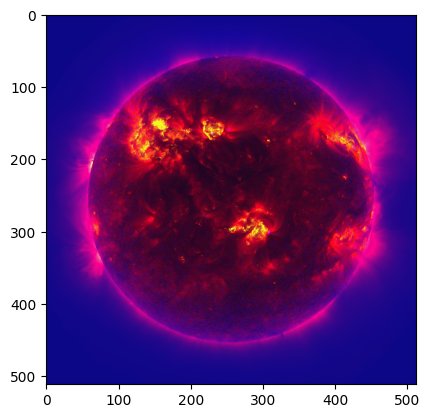

In [16]:
plt.imshow(output)

In [17]:
base_width = 32
multiplier = 1

sample_pic = np.zeros((base_width * multiplier, base_width * multiplier, 3))
cnt= 0
for y in range(base_width):
    for x in range(base_width):
        color_idx = y * 32 + x
        # print(color_idx)
        for yy in range(multiplier):
            for xx in range(multiplier):
                sample_pic[y*multiplier+yy, x*multiplier+xx, :] = colors[color_idx,:]
                # print(y*multiplier+yy,x*multiplier+xx )
        cnt += 1
        if cnt > 40: 
            break
    if cnt>4:
        break

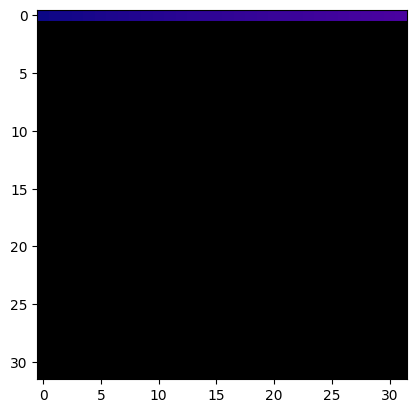

In [18]:
plt.imshow(sample_pic)

(1024, 1024, 3)


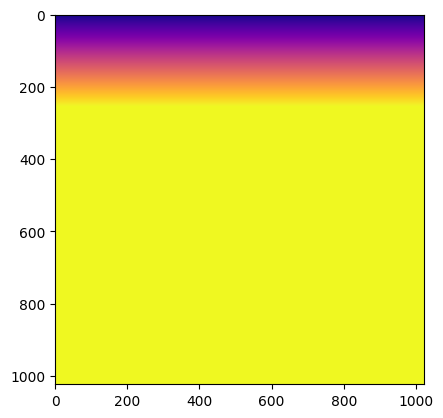

In [19]:
base_width = 32
multiplier = 1

sample_pic = np.zeros((base_width * base_width, 1024, 3))
print(sample_pic.shape)
cnt= 0
for y in range(1024):
    for tmp in range(1024):
        sample_pic[y,tmp,:] = colors[y, :]

plt.imshow(sample_pic)

In [20]:
data

array([[[0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## FULL PIPELINE

In [21]:
ind=4
data = np.load(f'q3_data/mysterydata{ind}.npy')
colors = np.load('q3_data/colors.npy')

In [22]:
v_min_nan = np.min(data[~np.isnan(data)])
data[np.isnan(data)] = v_min_nan

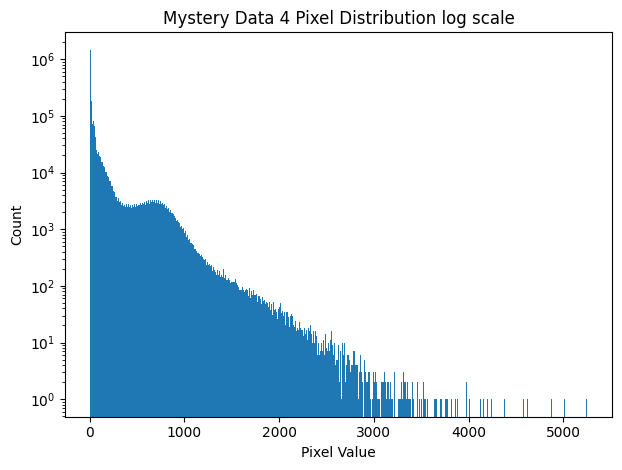

In [23]:
plt.title(f'Mystery Data {ind} Pixel Distribution log scale')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
plt.tight_layout()
result = plt.hist(data.reshape(-1), bins=500 , log = True)
tot_val = result[0]
tot_bin = result[1]

In [24]:
cumulative_val = np.cumsum(tot_val)

In [25]:
cumulative_val

array([1460755., 1640007., 1711817., 1792076., 1857615., 1900778.,
       1926122., 1950072., 1971448., 1994503., 2014431., 2033489.,
       2048919., 2064539., 2077350., 2089850., 2099972., 2110291.,
       2118823., 2127246., 2134215., 2141396., 2147154., 2152867.,
       2157495., 2162027., 2165710., 2169431., 2172627., 2176120.,
       2179086., 2182264., 2184948., 2187854., 2190469., 2193093.,
       2195546., 2198280., 2200699., 2203440., 2205876., 2208589.,
       2210990., 2213608., 2216086., 2218814., 2221257., 2224054.,
       2226587., 2229302., 2231940., 2234822., 2237480., 2240429.,
       2243218., 2246282., 2248974., 2252145., 2255055., 2258323.,
       2261118., 2264373., 2267371., 2270595., 2273647., 2276897.,
       2279853., 2283090., 2286017., 2289284., 2292105., 2295239.,
       2297984., 2300913., 2303586., 2306392., 2308717., 2311309.,
       2313584., 2315995., 2318018., 2320182., 2322148., 2324086.,
       2325933., 2327623., 2329228., 2330644., 2332110., 23334

In [26]:
percentile = 0.995
threshold = 512 * 512 * 9 * percentile
print(threshold)
outlier = -1
for idx in range(500):
    if cumulative_val[idx] > threshold:
        outlier = int(tot_bin[idx])
        break
print(f'Outlier for this data {outlier}')    


2347499.52
Outlier for this data 1134


In [27]:
data[data>outlier] = outlier

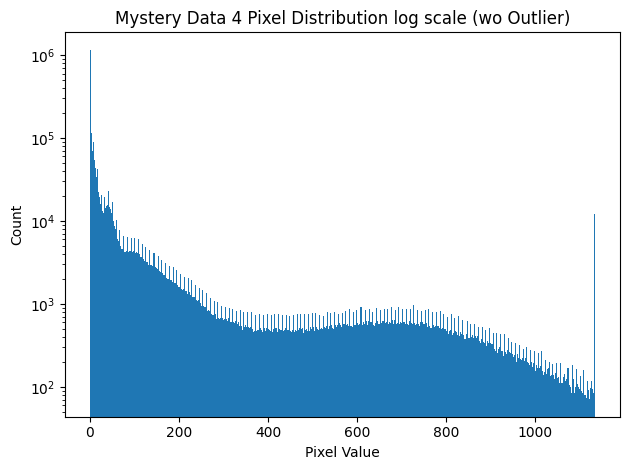

In [28]:
plt.title(f'Mystery Data {ind} Pixel Distribution log scale (wo Outlier)')

result = plt.hist(data.reshape(-1), bins=500 , log = True)
plt.xlabel('Pixel Value')
plt.ylabel('Count')
plt.tight_layout()
tot_val = result[0]
tot_bin = result[1]

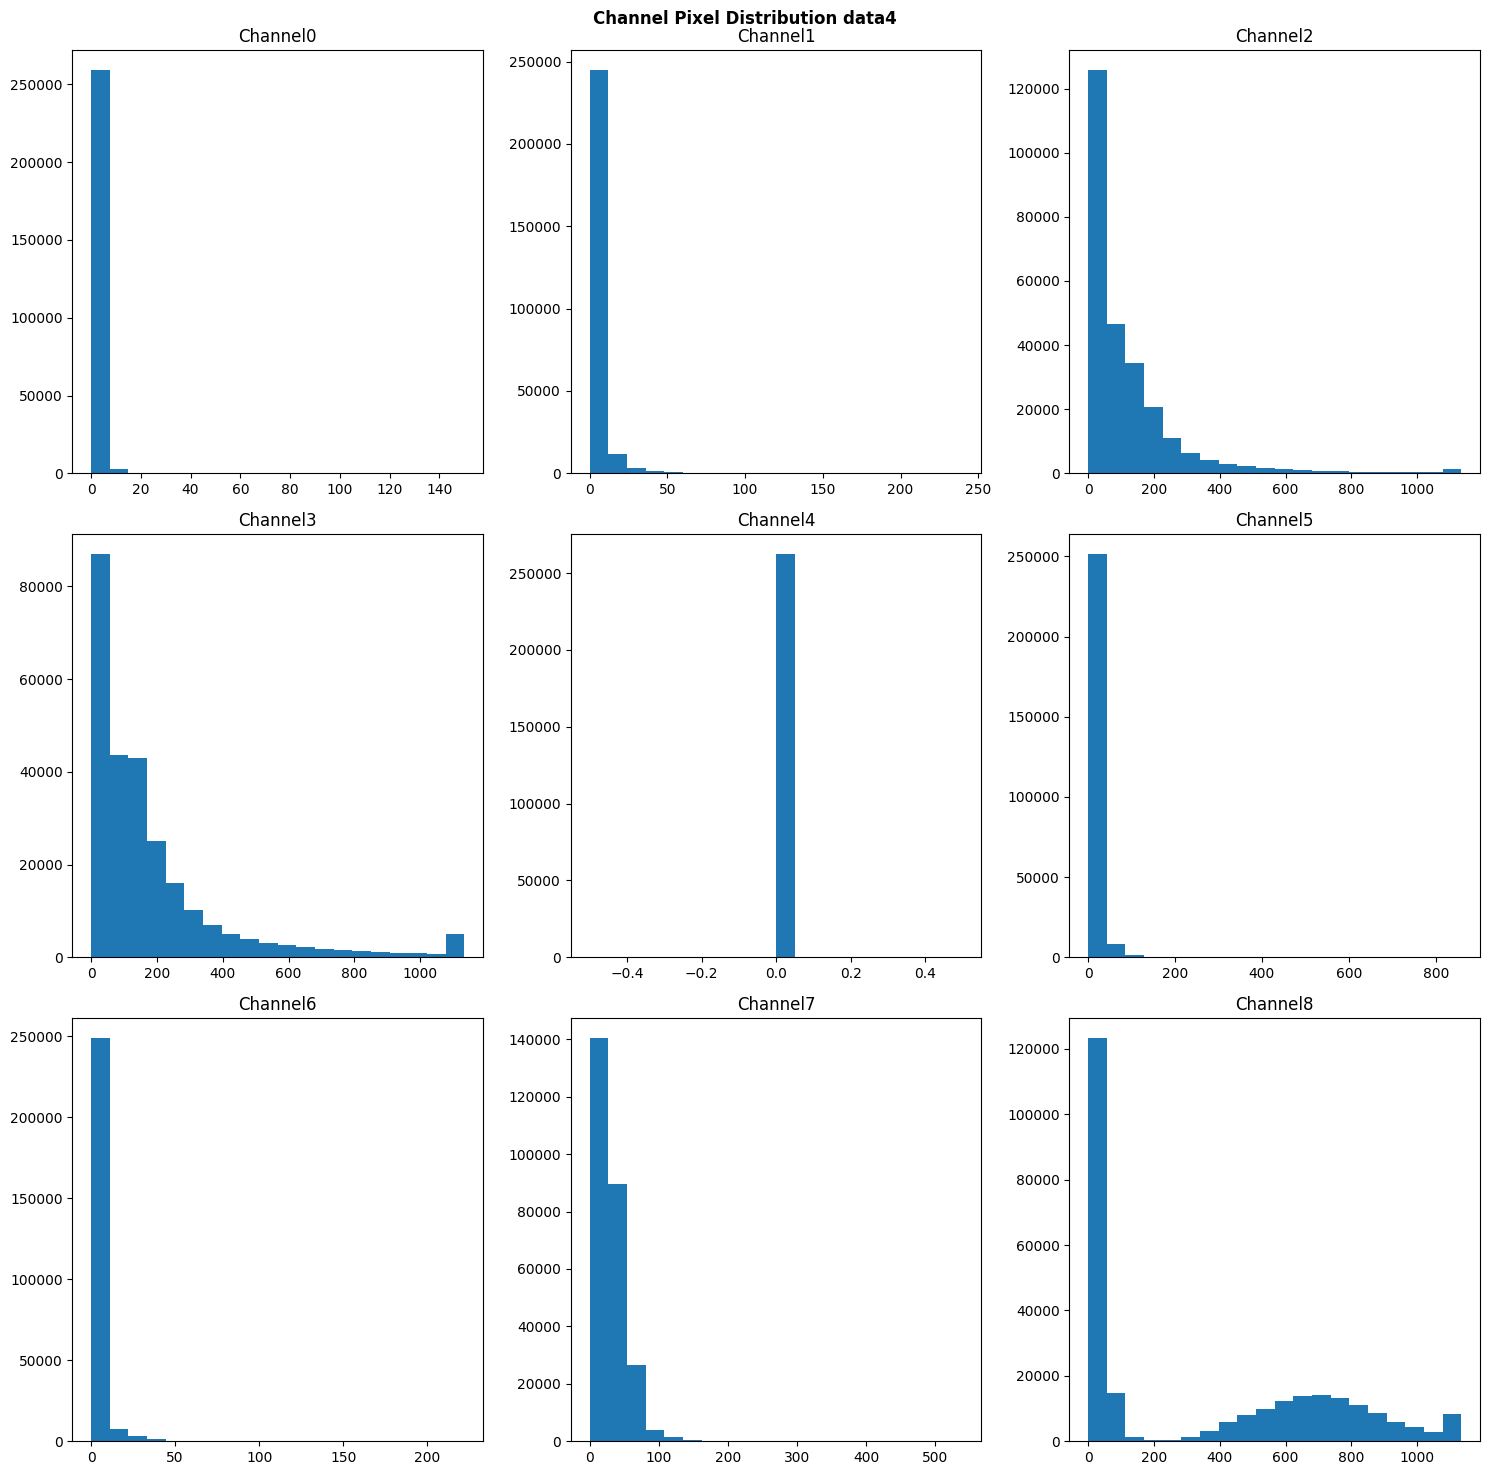

In [29]:
fig, ax = plt.subplots(3,3, figsize=(15,15))
fig.suptitle(f"Channel Pixel Distribution data{ind}", fontweight = "bold")

for xx in range(3):
    for yy in range(3):
        idx=xx*3+yy
        ax[xx,yy].hist(data[:,:,idx].reshape(-1),bins=20)
        ax[xx,yy].set_title(f"Channel{idx}")
plt.tight_layout()

In [30]:
std_data = data.copy().astype('float64')
epsilon = 1e6
for ch in range(9):
    cur_channel_mean = np.mean(data[:,:,ch])
    cur_channel_std = np.std(data[:,:,ch])
    print(data[:,:,ch].dtype)
    std_data[:,:,ch] = ((data[:,:,ch].reshape(-1) - cur_channel_mean) / (cur_channel_std + epsilon)).reshape(512,512)


uint32
uint32
uint32
uint32
uint32
uint32
uint32
uint32
uint32


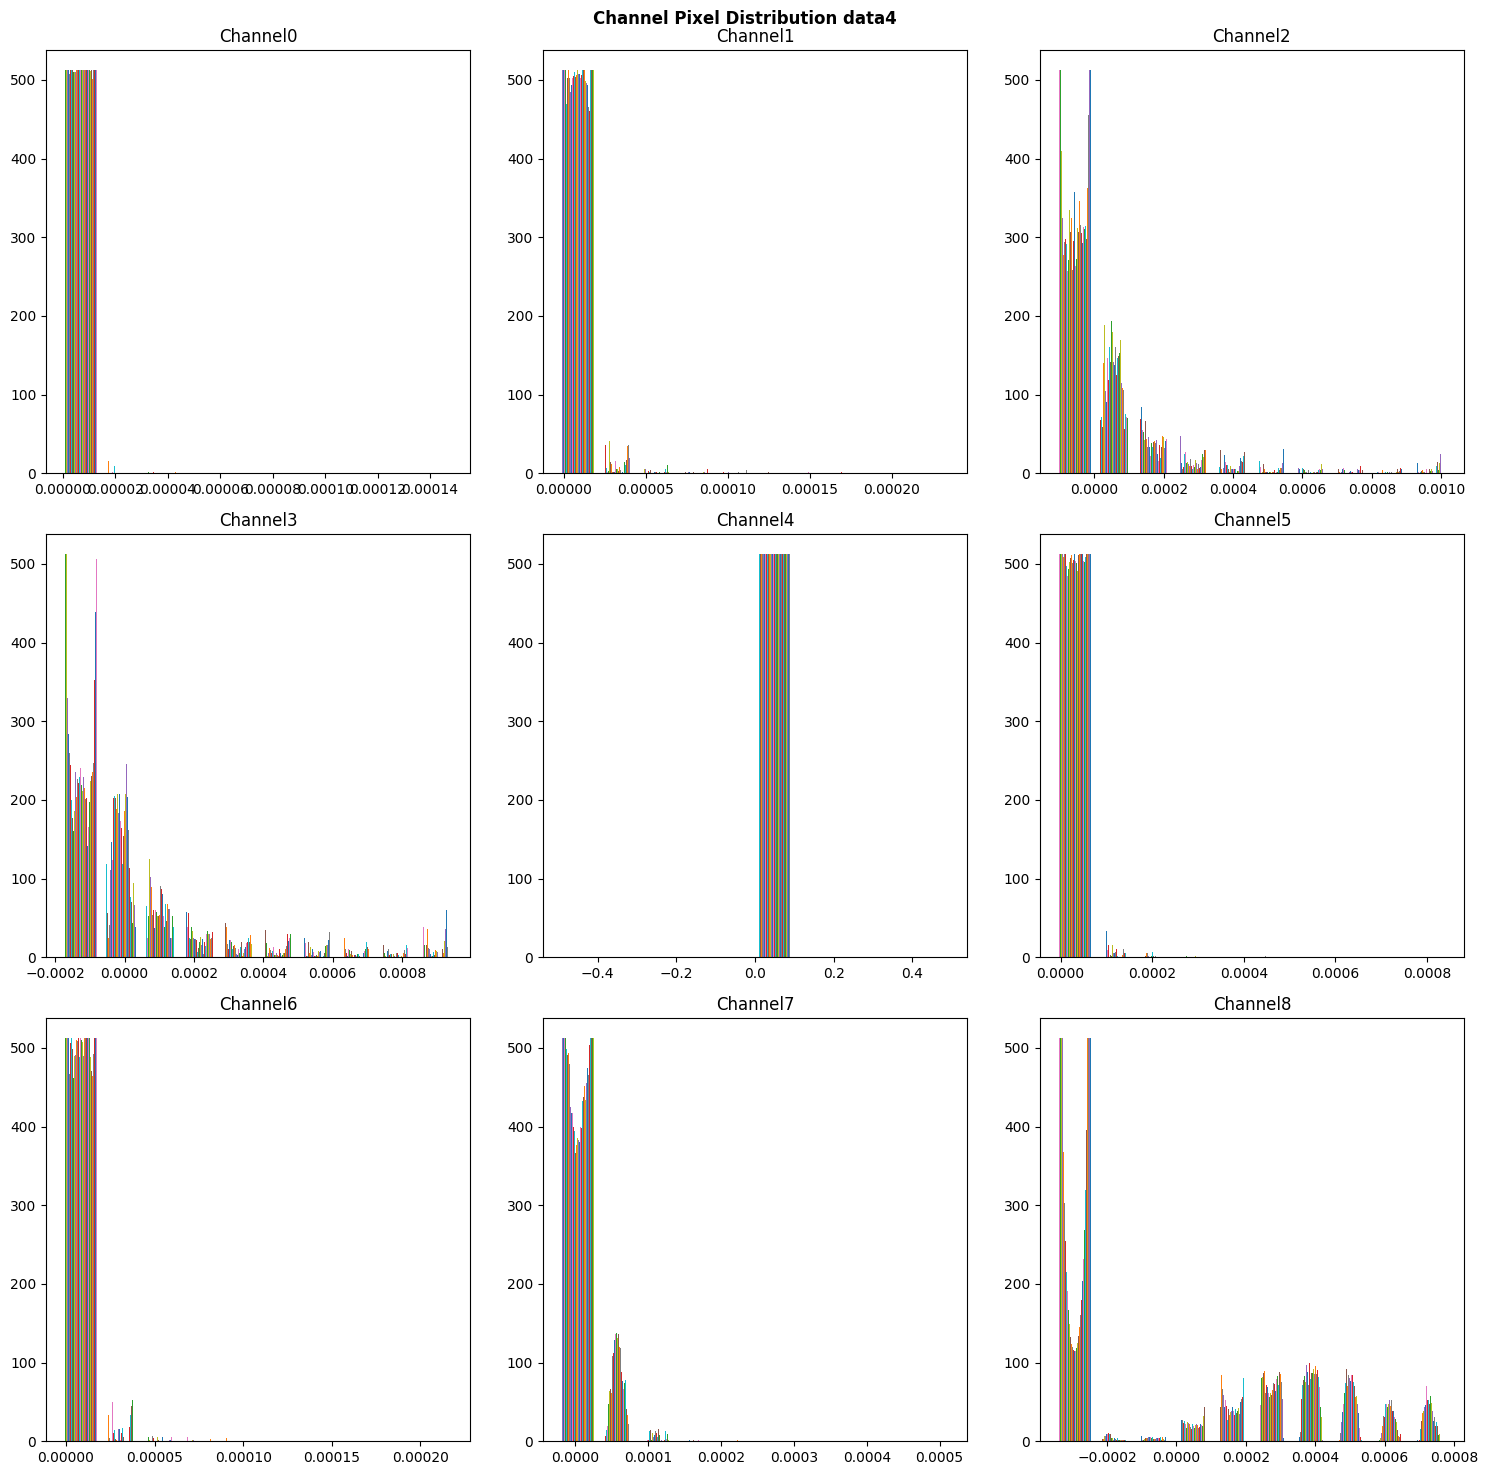

In [31]:
fig, ax = plt.subplots(3,3, figsize=(15,15))
fig.suptitle(f"Channel Pixel Distribution data{ind}", fontweight = "bold")

for xx in range(3):
    for yy in range(3):
        idx=xx*3+yy
        ax[xx,yy].hist(std_data[:,:,idx])
        ax[xx,yy].set_title(f"Channel{idx}")
plt.tight_layout()

In [32]:
# ch0 = np.stack([data[:,:,1],data[:,:,2],data[:,:,3],data[:,:,4]], axis = 2)
# data[data> 1000] = 0
# ch = data[:,:,[2,3,8]]

# ch = data[:,:,[0,1,5,7]]
ch = std_data
ch = np.mean(ch, axis=2)
print(ch)
new_pic_idx = np.zeros((512,512), dtype = 'float64')
new_pic_idx_int = np.zeros((512,512), dtype = 'int64')
output = np.zeros((512,512,3), dtype = 'float64')
v_max = ch.max()
v_min = ch.min()
new_pic_idx = (ch - v_min) / (v_max - v_min)
new_pic_idx = (1023) * new_pic_idx
new_pic_idx_int =  new_pic_idx.copy().astype('int64')
output[:,:,:] = colors[new_pic_idx_int, :]

[[-7.60832892e-05 -7.61943587e-05 -7.61943587e-05 ... -7.61943587e-05
  -7.61943587e-05 -7.61943587e-05]
 [-7.61943587e-05 -7.60832892e-05 -7.61943587e-05 ... -7.61943587e-05
  -7.61943587e-05 -7.61943587e-05]
 [-7.61943587e-05 -7.60832892e-05 -7.60832892e-05 ... -7.61943587e-05
  -7.61943587e-05 -7.61943587e-05]
 ...
 [-7.61943587e-05 -7.61943587e-05 -7.61943587e-05 ... -7.61943587e-05
  -7.61943587e-05 -7.61943587e-05]
 [-7.61943587e-05 -7.61943587e-05 -7.61943587e-05 ... -7.61943587e-05
  -7.61943587e-05 -7.61943587e-05]
 [-7.61943587e-05 -7.61943587e-05 -7.61943587e-05 ... -7.61943587e-05
  -7.61943587e-05 -7.61943587e-05]]


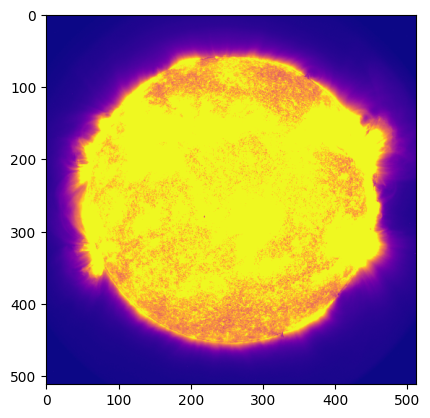

In [33]:
plt.imshow(output)

# DATA 2 

2347499.52
Outlier for this data 1038
[[13.11111111  1.44444444  2.88888889 ...  6.11111111  0.44444444
   0.44444444]
 [ 0.33333333  2.22222222  7.11111111 ...  1.77777778  0.44444444
   7.55555556]
 [22.22222222  6.44444444 11.44444444 ...  0.44444444  1.77777778
   3.22222222]
 ...
 [24.11111111  1.33333333  0.         ...  0.          9.88888889
  11.33333333]
 [ 0.66666667  7.77777778  4.44444444 ...  1.33333333  0.
   9.22222222]
 [ 5.66666667  4.22222222  5.66666667 ...  3.44444444  0.33333333
   4.55555556]]


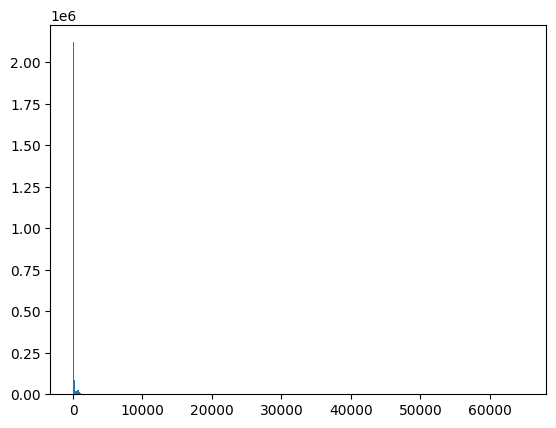

In [34]:
ind=2
data = np.load(f'q3_data/mysterydata{ind}.npy')
colors = np.load('q3_data/colors.npy')
min_val = np.min(data)
data[np.isnan(data)] = min_val
sorted_val = np.sort(data.reshape(-1))
result = plt.hist(sorted_val, bins=500)
tot_val = result[0]
tot_bin = result[1]
cumulative_val = np.cumsum(tot_val)

percentile = 0.995
threshold = 512 * 512 * 9 * percentile
print(threshold)
outlier = -1
for idx in range(500):
    if cumulative_val[idx] > threshold:
        outlier = int(tot_bin[idx])
        break
print(f'Outlier for this data {outlier}')    

data[data>outlier] = outlier

# ch0 = np.stack([data[:,:,1],data[:,:,2],data[:,:,3],data[:,:,4]], axis = 2)
# data[data> 1000] = 0
ch = np.mean(data, axis=2)
print(ch)
# ch = data[:,:,1]
new_pic_idx = np.zeros((512,512), dtype = 'float64')
new_pic_idx_int = np.zeros((512,512), dtype = 'int64')
output = np.zeros((512,512,3), dtype = 'float64')
v_max = ch.max()
v_min = ch.min()
new_pic_idx = (ch - v_min) / (v_max - v_min)
new_pic_idx = (1023) * new_pic_idx
new_pic_idx_int =  new_pic_idx.copy().astype('int64')
output[:,:,:] = colors[new_pic_idx_int, :]

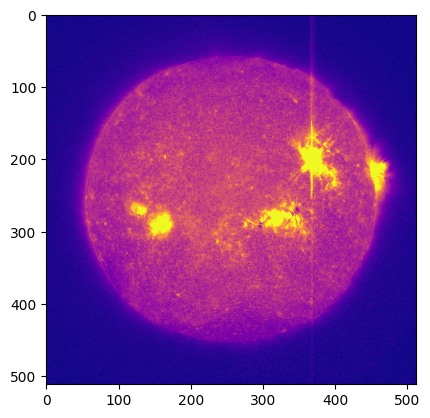

In [35]:
plt.imshow(output)

# DATA 3

0.0
2347499.52
Outlier for this data 1151
(512, 512)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.2877198  0.26617992 0.32192492 ... 0.08594081 0.32814065 0.18318638]
 [0.15436509 0.09375647 0.14116907 ... 0.17969902 0.21876825 0.20958588]
 [0.21876849 0.15626743 0.03125216 ... 0.2085146  0.15785372 0.04687474]]


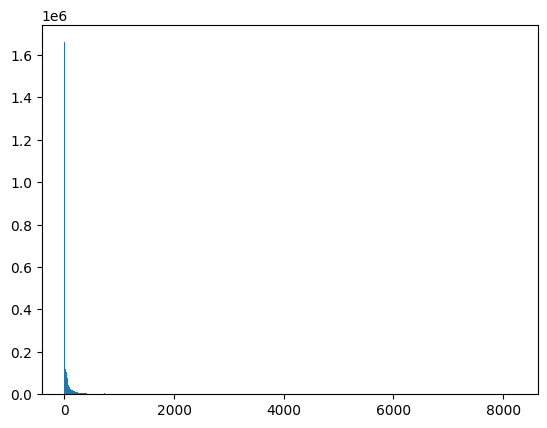

In [36]:
ind=3
data = np.load(f'q3_data/mysterydata{ind}.npy')
colors = np.load('q3_data/colors.npy')
v_min_nan = np.min(data[~np.isnan(data)])
print(v_min_nan)
data[np.isnan(data)] = v_min_nan
sorted_val = np.sort(data.reshape(-1))
result = plt.hist(sorted_val, bins=500)
tot_val = result[0]
tot_bin = result[1]
cumulative_val = np.cumsum(tot_val)

percentile = 0.995
threshold = 512 * 512 * 9 * percentile
print(threshold)
outlier = -1
for idx in range(500):
    if cumulative_val[idx] > threshold:
        outlier = int(tot_bin[idx])
        break
print(f'Outlier for this data {outlier}')    

data[data>outlier] = outlier


ch = np.mean(data[:,:,[2,3,4,8]], axis=2)
# ch = np.mean(data[:,:,[0,1,5,6,7]], axis=2)

print(ch.shape)
# data[data> 1000] = 0
# ch = np.mean(data, axis=2)

print(ch)
# ch = data[:,:,1]
new_pic_idx = np.zeros((512,512), dtype = 'float64')
new_pic_idx_int = np.zeros((512,512), dtype = 'int64')
output = np.zeros((512,512,3), dtype = 'float64')
v_max = ch.max()
v_min = ch.min()
new_pic_idx = (ch - v_min) / (v_max - v_min)
new_pic_idx = (1023) * new_pic_idx
new_pic_idx_int =  new_pic_idx.copy().astype('int64')
output[:,:,:] = colors[new_pic_idx_int, :]

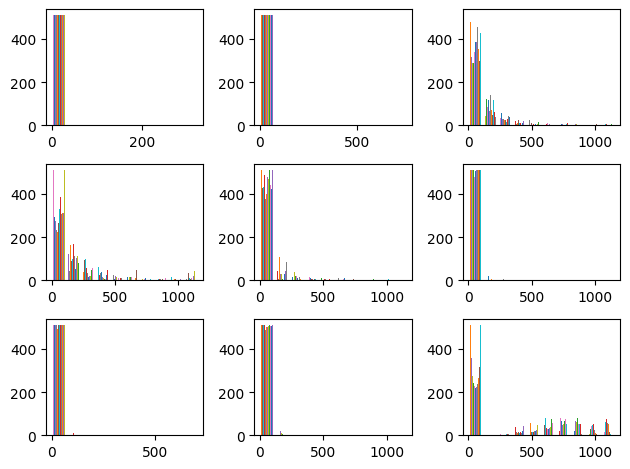

In [37]:
plt.subplot(3,3,9)

for ax in range(3):
    for ay in range(3):
        idx = ax * 3 + ay
        plt.subplot(3,3,idx+1)
        plt.hist(data[:,:,idx])
plt.tight_layout()
plt.savefig('default.png',dpi = 600)

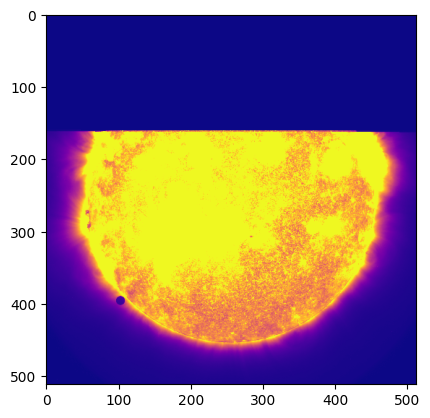

In [38]:
plt.imshow(output)

In [39]:
cv2.imread('./q2_data/images_200/the-scream.jpg').shape

(200, 158, 3)